In [103]:
!pip install nengo

In [104]:
import nengo
import numpy as np
import matplotlib.pyplot as plt

nengo.rc.set('decoder_cache', 'enabled', 'False')

In [105]:
N = 40
dt = 0.001
delay_duration = 0.2
T = 2.0

In [106]:
class DelayNode:
    def __init__(self, N, delay, dt=0.001):
        self.buf_len = int(delay / dt)
        self.buffer = np.zeros((self.buf_len, N))
        self.ptr = 0

    def update(self, t, x):
        v = self.buffer[self.ptr].copy()
        self.buffer[self.ptr] = x
        self.ptr = (self.ptr + 1) % self.buf_len
        return v

In [107]:
model = nengo.Network(label="Delayed connection")
with model:
    noise_process = nengo.processes.WhiteSignal(period=T, high=10.0, rms=0.25, seed=3423)
    inp = nengo.Node(noise_process, size_out=1)
    A = nengo.Ensemble(40, dimensions=1, neuron_type=nengo.AdaptiveLIF())
    nengo.Connection(inp, A)

    delay = DelayNode(N=1, delay=delay_duration, dt=dt)

    delay_node = nengo.Node(delay.update, size_in=1, size_out=1)
    nengo.Connection(A, delay_node, synapse=None)

    A_probe = nengo.Probe(A, synapse=None)
    delay_probe = nengo.Probe(delay_node, synapse=None)


In [108]:
with nengo.Simulator(model) as sim:
    sim.run(T)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

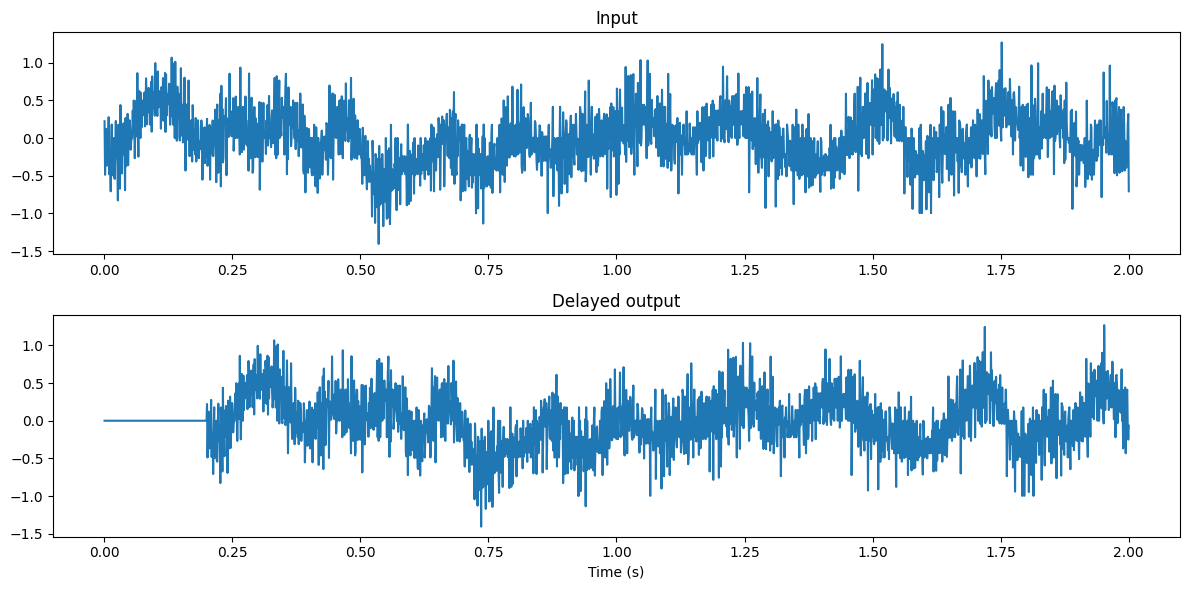

In [109]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[A_probe])
plt.title("Input")
plt.subplot(2, 1, 2)
plt.plot(sim.trange(), sim.data[delay_probe])
plt.title("Delayed output")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()